<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotting-contours-of-reduced-Hamiltonian" data-toc-modified-id="Plotting-contours-of-reduced-Hamiltonian-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting contours of reduced Hamiltonian</a></span></li></ul></div>

## Plotting contours of reduced Hamiltonian for $p_{\phi} = p$ conserved

In [1]:
import numpy as np

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


In [2]:
def reduced_hamiltonian(points, field_parameters):
    
    R0, C, mu, p = field_parameters
    
    r = points[:,0]
    z = points[:,1]
    
    psi = 0.5*(r**2 + z**2)
    
    Hp = 0.5*((C**2 + 2*psi)/(C**2*(r + R0)**2))*(p - psi)**2 + \
        (mu/(r + R0))*np.sqrt(C**2 + 2.0*psi)
    
    return Hp

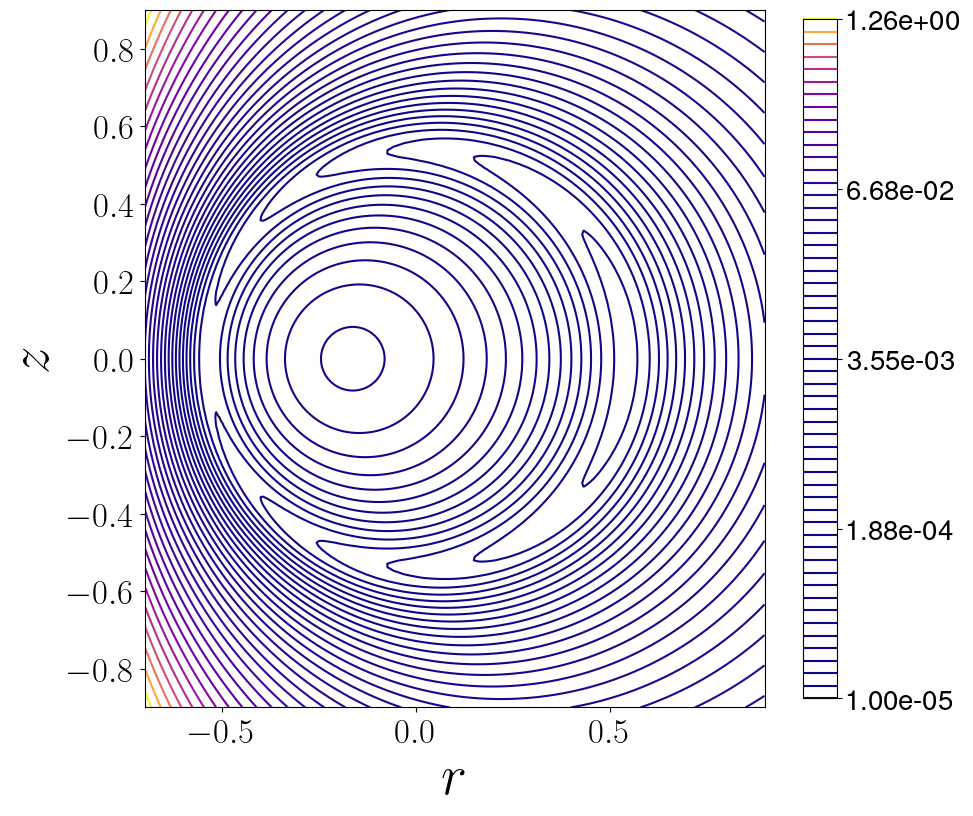

In [3]:
%matplotlib inline

tick_labelsize = 25 #10, 20
axes_labelsize = 40
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize

resolution = 200
rGrid = np.linspace(-0.7, 0.9, resolution) # toroidal angle
zGrid = np.linspace(-0.9, 0.9, resolution) # poloidal angle
rMesh, zMesh  = np.meshgrid(rGrid, zGrid)


points = np.concatenate([rMesh.flatten().reshape((resolution*resolution,1)), \
                            zMesh.flatten().reshape((resolution*resolution,1))], axis = 1)

field_parameters = [1, 5.5, 0.0002, 0.145] # R0, C, mu, p
# field_parameters = [1, 6, 0.00001, 0.01]

reduced_ham = reduced_hamiltonian(points, field_parameters)

reduced_ham = np.reshape(reduced_ham, (resolution,resolution))

fig = plt.figure(figsize=(10,10), dpi=100)
ax1 = fig.add_subplot(111)

# cset1 = ax1.contour(rMesh, zMesh, reduced_ham, levels = np.logspace(-5,1,50), colors = 'black')
cset1 = ax1.contour(rMesh, zMesh, reduced_ham, levels = np.logspace(-5,0.1,55), cmap = cm.plasma)
# cset2 = ax1.contour(rMesh, zMesh, reduced_ham, levels = np.logspace(-2,-1,100) - 1, colors = 'black')
ax1.set_xlabel(r'$r$')
ax1.set_ylabel(r'$z$')
cbar1 = fig.colorbar(cset1, ax = ax1, ticks = np.logspace(-5,0.1,5), shrink = 0.9)
# cbar1.ax.ticklabel_format(style = 'sci')
cbar1.ax.set_yticklabels(["{%.2e}"%i for i in cbar1.get_ticks()], fontsize = 20)
ax1.set_aspect('equal')

# plt.savefig('reduced_hamiltonian_C%.2f'%(field_parameters[1]) + \
#             '_mu%.3e'%(field_parameters[2]) + '_p%.3e'%(field_parameters[3]) + '.pdf',bbox_inches = 'tight')


## Plot contours of $p_{\phi}$ for fixed value of reduced Hamiltonian, $H_p$

In [4]:

def toroidal_momentum(points, parameters):
    
    R0, C, mu, h = field_parameters
    
    u = points[:,0]
    z = points[:,1]
    
    # Solution of quadratic for R
    # aterm = (mu**2 - (h*mu - (mu*u**2)/2)**2)
    # bterm = -2*R0*mu**2
    aterm = ((h*mu - 0.5*mu*u**2)**2 - mu**2)
    bterm = -2*R0*mu**2
    cterm = -mu**2*(C**2 + R0**2 + z**2)
    # r = (-bterm + np.sqrt(bterm**2 - 4*aterm*cterm))/(2*aterm) - R0
    # r = (-bterm - np.sqrt(bterm**2 - 4*aterm*cterm))/(2*aterm) - R0
    r = (-bterm + np.sqrt(bterm**2 - 4*aterm*cterm))/(2*aterm) - R0
    
    pPhi = 0.5*(r**2 + z**2) + (np.sqrt(mu)*u*C)/(h - 0.5*u**2)
    
    return pPhi



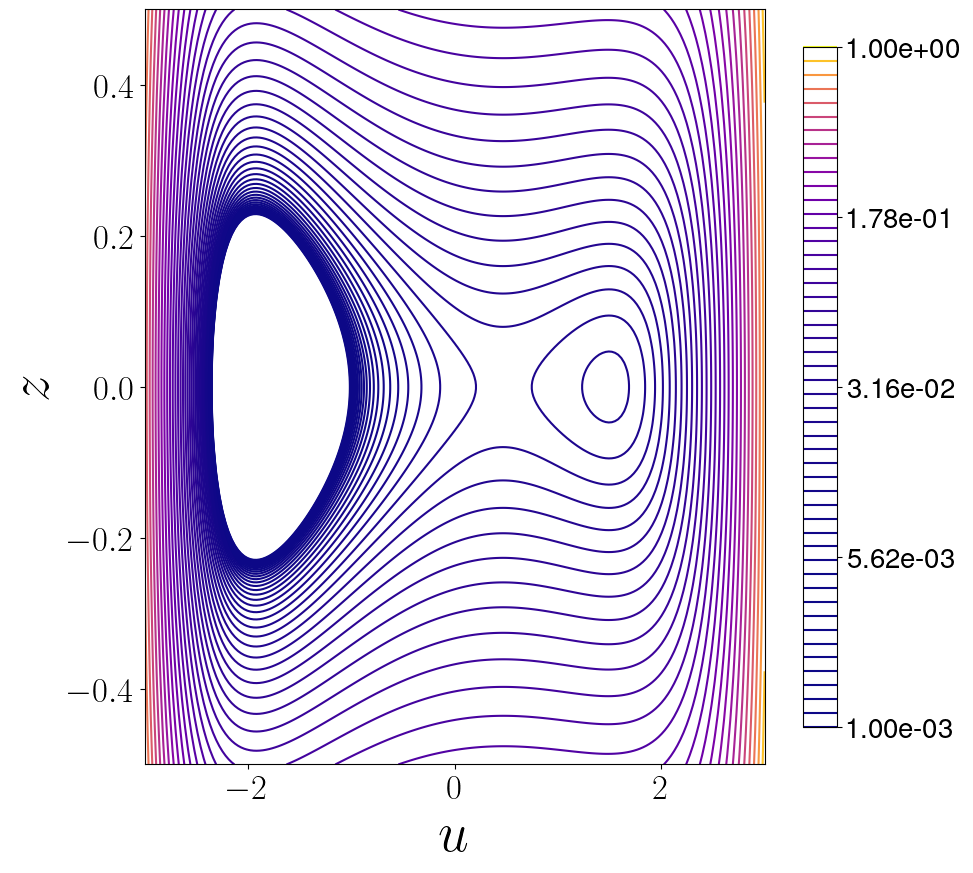

In [13]:
%matplotlib inline

tick_labelsize = 25 #10, 20
axes_labelsize = 40
mpl.rcParams['xtick.labelsize'] = tick_labelsize
mpl.rcParams['ytick.labelsize'] = tick_labelsize
mpl.rcParams['axes.labelsize'] = axes_labelsize

resolution = 200
uGrid = np.linspace(-3, 3, resolution) # scaled parallel velocity
zGrid = np.linspace(-0.5, 0.5, resolution) 
uMesh, zMesh  = np.meshgrid(uGrid, zGrid)


points = np.concatenate([uMesh.flatten().reshape((resolution*resolution,1)), \
                            zMesh.flatten().reshape((resolution*resolution,1))], axis = 1)

field_parameters = [1.0, 5.5, 0.0002, 7.4] # R0, C, mu, h

pPhi = toroidal_momentum(points, field_parameters)

pPhiMesh = np.reshape(pPhi, (resolution,resolution))

fig = plt.figure(figsize=(10,10), dpi=100)
ax1 = fig.add_subplot(111)

# cset1 = ax1.contour(rMesh, zMesh, reduced_ham, levels = np.logspace(-5,1,50), colors = 'black')
cset1 = ax1.contour(uMesh, zMesh, pPhiMesh, \
                    levels = np.logspace(-3,0,50), \
                    cmap = cm.plasma)

# cset2 = ax1.contour(rMesh, zMesh, reduced_ham, levels = np.logspace(-2,-1,100) - 1, colors = 'black')
ax1.set_xlabel(r'$u$')
ax1.set_ylabel(r'$z$')
cbar1 = fig.colorbar(cset1, ax = ax1, ticks = np.logspace(-3,0,5), shrink = 0.9)
# cbar1.ax.ticklabel_format(style = 'sci')
cbar1.ax.set_yticklabels(["{%.2e}"%i for i in cbar1.get_ticks()], fontsize = 20)
# ax1.set_aspect('equal')

# plt.savefig('pPhi_C%.2f'%(field_parameters[1]) + \
#             '_mu%.3e'%(field_parameters[2]) + '_h%.3e'%(field_parameters[3]) + '.pdf',bbox_inches = 'tight')
